## **Proyecto Data Science - Beijin data pollution**

#### **Introduction**
  + Beijing PM2.5 Data Set

#### **Data Wrangling**

#### **Data Analysis and Model Building**
  + 1. Univariate
    + Analisis
    + Decomposition
    + Forecast


  
  + 2. Multivariate
    + Correlation
    + Regression models
    + Forecast
  
***

### **Introduction**

The examination of the Beijing PM2.5 dataset, a multivariate time series centered on the amount of fine particulate matter in the air of Beijing city, is the subject of the report. We'll proceed in two different ways: first, we'll focus on the dataset in a univariate sense, analyzing and visualizing it with the right tools on just one variable of the dataset (PM2.5); second, we'll look at the dataset in a multivariate sense, examining any potential correlations between the variables of the dataset and estimating a predictive model for the amount of PM2.5 in the air.

  
##### - **Beijing PM2.5 Data Set**

The Beijing PM2.5 dataset consists of 13 variables that describe various environmental parameters recorded in the city of Beijing from January 1st, 2010 to December 31st, 2014. 43,824 observations were collected, with hourly frequency. So we are dealing with a discrete and evenly spaced time series.

The primary variable of interest is pm2.5, which is the amount of PM2.5 (ug/m3) in the air. PM2.5 is a numerical classification for fine particulate matter based on the average size of its particles; in our case, we refer to the grouping of particles with sizes equal to or less than 2.5 microns (um); 1 micron (u) equals a thousandth of a millimeter. In general, the number indicates how tiny the particulate matter is and how hazardous it is to both human and animal health. In reality, PM 2.5 can enter the lung alveoli and may diffuse into the circulation, but PM 10 only reaches the bronchi, trachea, and upper respiratory tract.

The other variables present are:

* _year_: the year of observation registration
* _month_: the month of observation registration
* _day_: the day of observation registration
* _hour_: the hour of observation registration
* _DEWP_: the dew point (a particular thermodynamic state)
* _TEMP_: the ambient temperature
* _PRES_: atmospheric pressure
* _cbwd_: the combined wind direction
* _Iws_: the cumulative wind speed (in m/s)
* _Is_: the cumulative hours of snow
* _Ir_: the cumulative hours of rain
  
  
***

### **Data Wrangling**

The dataset needs to be ready for the following stages of analysis before continuing. The data contains errors, such as missing values and variables that require proper formatting.
The __No__ variable is initially eliminated because it only served to denote the i-th observation. The year, month, and day variables are then combined to create a __DATE__ variable, which removes them from the dataset.

In [105]:
## Import libraries ##
import pandas as pd
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import datetime as dt
mlp.style.use('bmh')


In [106]:
## Import data set ##
df = pd.read_csv('/workspaces/coderhouse/Desafíos/Data/Beijin_data_pollution.csv')
df.shape


(43824, 13)

In [107]:
df.dropna(inplace=True)
df.info()
df['month'] = df['month'].astype(str).str.pad(2,fillchar='0')
df['hour'] = df['hour'].astype(str).str.pad(2,fillchar='0')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [108]:
pd.unique(df['hour'])

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [109]:
df['DATE'] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)+'-'+df['hour'].astype(str)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DATE
24,25,2010,01,2,00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-2-00
25,26,2010,01,2,01,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-2-01
26,27,2010,01,2,02,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-2-02
27,28,2010,01,2,03,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-2-03
28,29,2010,01,2,04,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-2-04


In [110]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d-%H")

In [111]:
df.drop(columns=['year','day','hour','No'],inplace=True)
values=df.values
df.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DATE
24,01,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,01,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,01,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,01,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,01,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [112]:
df.describe().round(2)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.00,41757.00,41757.00,41757.00,41757.00,41757.00,41757.00
mean,98.61,1.75,12.40,1016.44,23.87,0.06,0.19
std,92.05,14.43,12.18,10.30,49.62,0.78,1.42
min,0.00,-40.00,-19.00,991.00,0.45,0.00,0.00
25%,29.00,-10.00,2.00,1008.00,1.79,0.00,0.00
50%,72.00,2.00,14.00,1016.00,5.37,0.00,0.00
75%,137.00,15.00,23.00,1025.00,21.91,0.00,0.00
max,994.00,28.00,42.00,1046.00,565.49,27.00,36.00


In [113]:
def count_missing_values(df):
    return df.isnull().sum()

missing_values = count_missing_values(df)
missing_values

month    0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
DATE     0
dtype: int64


***

### **Data Analysis and Model Building**
#### - **1. Univariate**
  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'PM2.5 level')

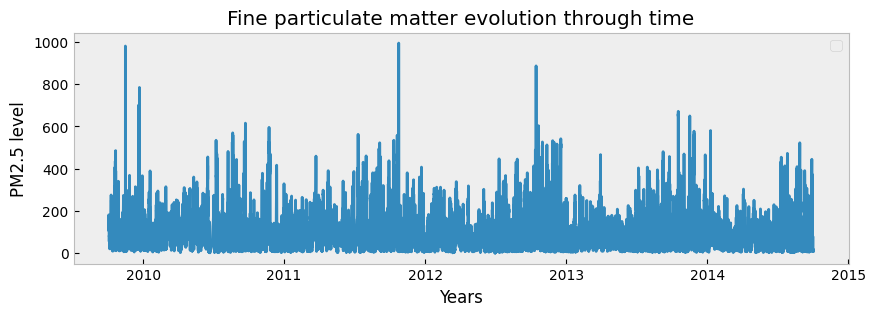

In [115]:
fig, ax = plt.subplots(figsize=(10, 3))
year_locator = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(year_locator)
ax.plot(df['DATE'], df['pm2.5'])
ax.legend()
ax.grid()
ax.set_title('Fine particulate matter evolution through time')
ax.set_xlabel('Years')
ax.set_ylabel('PM2.5 level')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Hours')

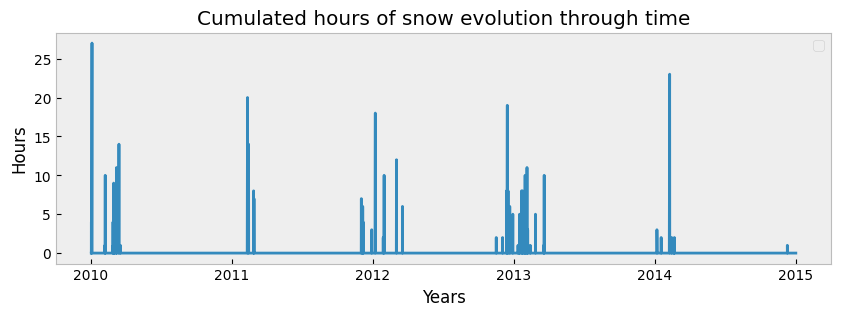

In [116]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df['DATE'], df['Is'])
ax.legend()
ax.grid()
ax.set_title('Cumulated hours of snow evolution through time')
ax.set_xlabel('Years')
ax.set_ylabel('Hours')


We will conduct a univariate analysis taking into account the variable of interest PM2.5, as described in the introduction.
The daily average of the PM2.5 airborne particle concentration is shown in the graph above.
The measurements were initially made hourly, but in order to make the series' display even more straightforward, we'll now average the numbers on a monthly basis.
The graph changes to:

In [119]:
months = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}
df['month_name'] = df['month'].map(months)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Cumulated hours')

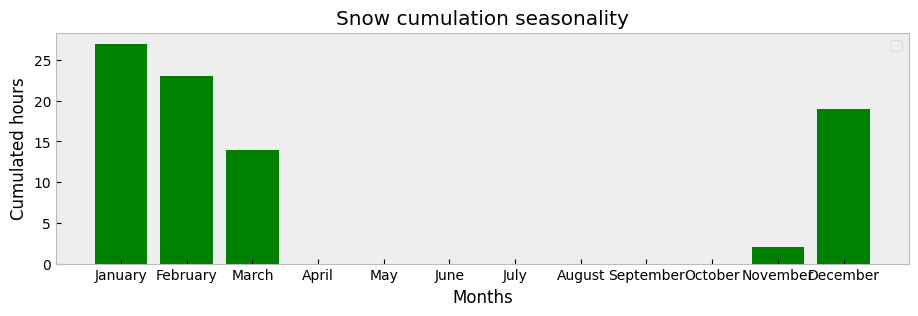

In [118]:
fig, ax = plt.subplots(figsize=(11, 3))
ax.bar(df['month_name'], df['Is'],color='g')
ax.legend()
ax.grid()
ax.set_title('Snow cumulation seasonality')
ax.set_xlabel('Months')
ax.set_ylabel('Cumulated hours')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Temp in F°')

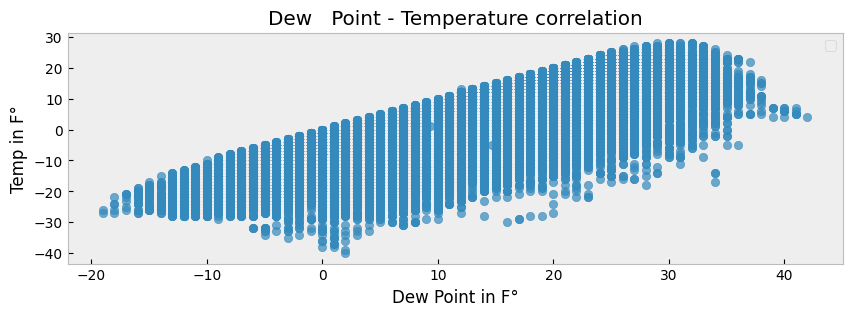

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(df['TEMP'], df['DEWP'], alpha=0.7)
ax.legend()
ax.grid()
ax.set_title('Dew   Point - Temperature correlation')
ax.set_xlabel('Dew Point in F°')
ax.set_ylabel('Temp in F°')

Text(0, 0.5, 'Dew Point in F°')

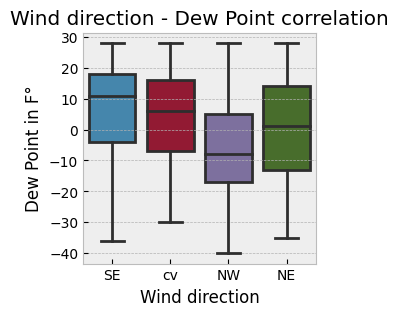

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.boxplot(x='cbwd', y = 'DEWP', data = df)
ax.set_title('Wind direction - Dew Point correlation')
ax.set_xlabel('Wind direction')
ax.set_ylabel('Dew Point in F°') 

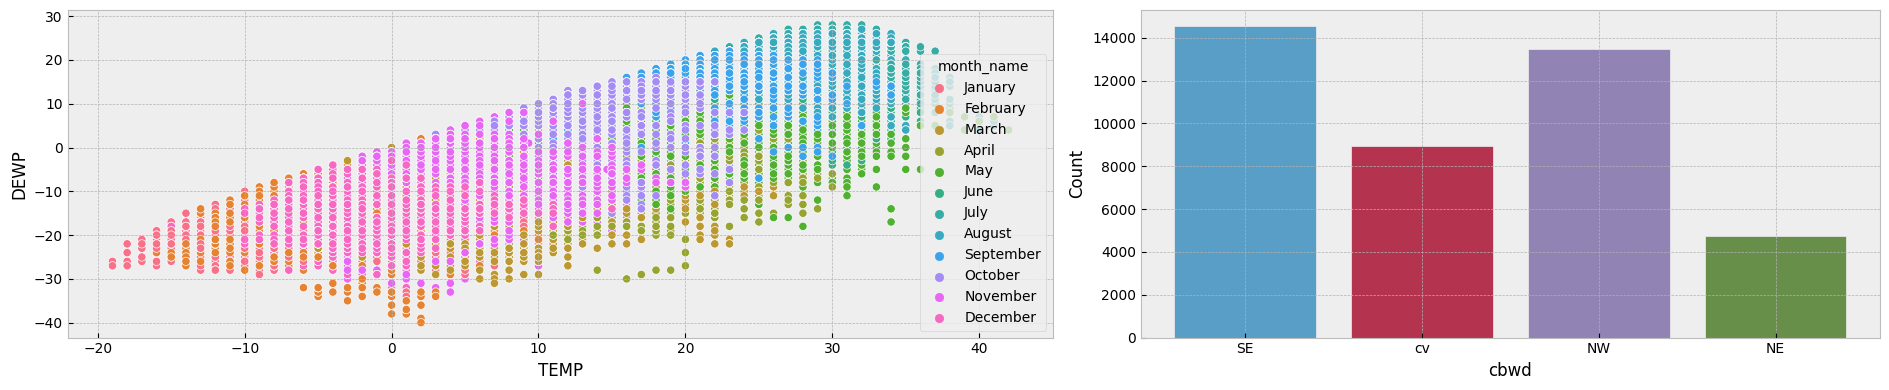

In [ ]:

f, axs = plt.subplots(1, 2, figsize=(19, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="TEMP", y="DEWP", hue="month_name", ax=axs[0])
sns.histplot(data=df, x="cbwd", hue="cbwd", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

  
#### - **Analysis**
  
* At first glance, the series shows a quite high level of variability over time, characterized by phases of growth and irregular decline in the medium to long term.
* The fluctuations do not seem to have a fixed frequency or be linked to temporal aspects (for example, similar changes in the same months).
* A seasonal component seems to be excluded since we do not have the repetition of the same behavior in the series in every year (peaks and phases of decline are not regular and constant over time).
* There is also a lack of trend, confirmed by the fact that, both looking at it as a whole and dividing it into sub-periods, these have very similar means whose value oscillates around 100 (ug/m^3).
* Towards the end of 2012, we have a growth phase that ends with a peak, the maximum value recorded in February 2013, and continues with a phase of decline.
* The minimum point was recorded in February 2011 with a value of 43.41 (ug/m^3). The cause of this could be political in nature: in 2011, there was a protest by Chinese citizens in favor of democracy.
Since fine particulate PM2.5 is typically produced by anthropogenic sources (industries, heating, vehicular traffic and combustion processes in general), the general stop due to the protest may have positively influenced PM2.5 emissions in the air.
* Having excluded the seasonal component and the presence of trend, we can affirm that the series is stationary, but with further analysis we can confirm this prediction."